## 3. Cancer Type Comparisons and Silent vs Nonsilent Mutations

In [1]:
setwd("/Users/jacobbradley/Documents/CCG/Code")

### Packages

In [2]:
install.packages("tidyverse")
library(tidyverse)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37


The downloaded binary packages are in
	/var/folders/g9/9x6m35fn5ydf88vdlm9n1vg80000gn/T//Rtmp6tTTcP/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'BiocManager', 'BiocParallel', 'circlize', 'ELMER',
  'ensembldb', 'farver', 'foreign', 'ggpubr', 'Gviz', 'haven', 'IRdisplay',
  'lattice', 'MASS', 'Matrix', 'mclust', 'mgcv', 'openssl', 'RcppEigen',
  'readr', 'repr', 'rtracklayer', 'survival', 'VariantAnnotation'
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clust

In [3]:
source("TMB_Funcs.txt")
# My Stuff!

### Get correlation data for three cancer types, nonsilent and silent mutations

In [9]:
chromosomes <- c(1:22,"X","Y")
genome <- BSgenome.Hsapiens.UCSC.hg19

window_size <- 1000000
jump_length <- 100000

In [30]:
#new_data <- read_tsv("/Volumes/CCG8/processed_data/brca_tcga/data_mutations_extended.txt")
#tcga_brca_hotspots <- genome_slide(maf_file = new_data, global_tmb_table = NULL, window_size, jump_length)

#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots', x = tcga_brca_hotspots)

tcga_brca_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots', col_types = list(col_character(), col_guess(), col_guess(), col_guess()))

In [31]:
#nsclc_data <- read_tsv("/Volumes/CCG8/processed_data/nsclc_tcga_broad_2016/data_mutations_extended.txt", skip = 1)
#tcga_nsclc_hotspots <- genome_slide(maf_file = nsclc_data, global_tmb_table = NULL, window_size, jump_length)

#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots', x = tcga_nsclc_hotspots)
tcga_nsclc_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots', col_types = list(col_character(), col_guess(), col_guess(), col_guess()))

In [32]:
#coadread_data <- read_tsv("/Volumes/CCG8/processed_data/coadread_tcga/data_mutations_extended.txt")
#tcga_coadread_hotspots <- genome_slide(maf_file = coadread_data, global_tmb_table = NULL, window_size, jump_length)

#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots', x = tcga_coadread_hotspots)
tcga_coadread_hotspots <- read_tsv('/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots', col_types = list(col_character(), col_guess(), col_guess(), col_guess()))

In [33]:
#tcga_brca_hotspots_ns <- genome_slide(maf_file = new_data, global_tmb_table = NULL, window_size, jump_length, ns = TRUE)
#tcga_nsclc_hotspots_ns <- genome_slide(maf_file = nsclc_data, global_tmb_table = NULL, window_size, jump_length, ns = TRUE)
#tcga_coadread_hotspots_ns <- genome_slide(maf_file = coadread_data, global_tmb_table = NULL, window_size, jump_length, ns = TRUE)

#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_ns', x = tcga_brca_hotspots_ns)
#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots_ns', x = tcga_nsclc_hotspots_ns)
#write_tsv(path = '/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots_ns', x = tcga_coadread_hotspots_ns)

tcga_brca_hotspots_ns <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/tcga_brca_hotspots_ns", col_types = list(col_character(), col_guess(), col_guess(), col_guess()))
tcga_nsclc_hotspots_ns <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/tcga_nsclc_hotspots_ns", col_types = list(col_character(), col_guess(), col_guess(), col_guess()))
tcga_coadread_hotspots_ns <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/tcga_coadread_hotspots_ns", col_types = list(col_character(), col_guess(), col_guess(), col_guess()))


### Compare critical loci across three cancer types

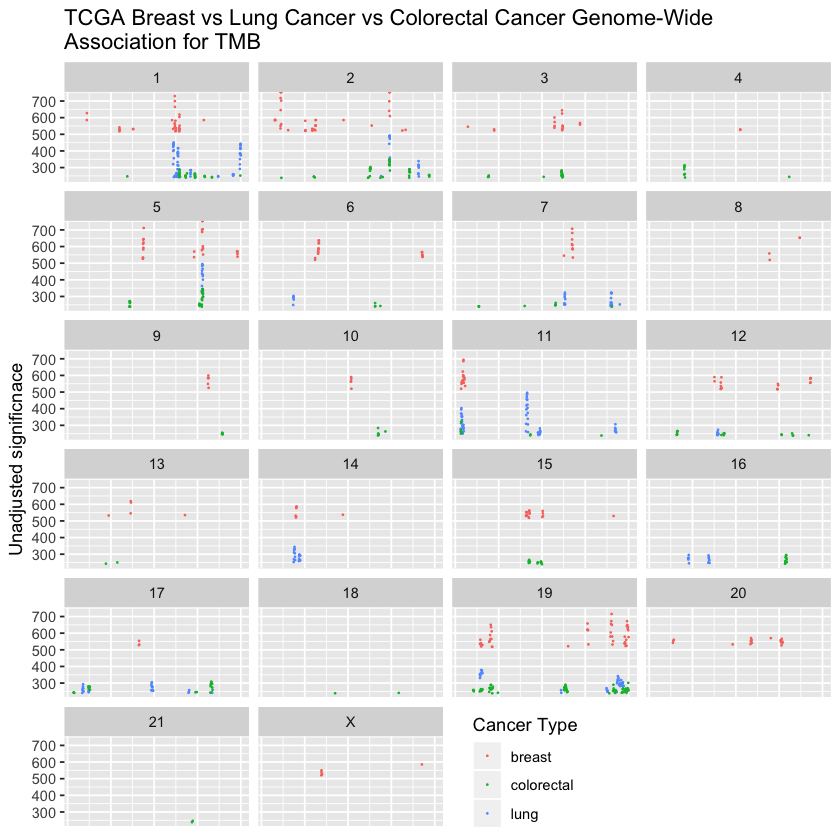

In [34]:
three_types_hotspots <- bind_rows((tcga_brca_hotspots %>% 
                                      mutate(cancer_type = "breast") %>% 
                                      filter(significance > quantile(significance, .99))),
                                 (tcga_nsclc_hotspots %>% 
                                     mutate(cancer_type = "lung") %>% 
                                     filter(significance > quantile(significance, .99))),
                                 (tcga_coadread_hotspots %>% 
                                     mutate(cancer_type = "colorectal") %>% 
                                     filter(significance > quantile(significance, .99))))

three_types_hotspots %>% 
    ggplot(aes(x = key, y = significance, colour = cancer_type)) + 
    geom_point(size = 0.1) + scale_size(range = c(0.1,0.5)) + theme(legend.position = c(0.6,0.075)) + 
    labs(x = NULL, y = "Unadjusted significnace") + scale_colour_discrete(name="Cancer Type") +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())+
    ggtitle("TCGA Breast vs Lung Cancer vs Colorectal Cancer Genome-Wide\nAssociation for TMB") + facet_wrap(~factor(chromosome, levels = chromosomes), ncol = 4)
    

In [35]:
venn_values <- three_types_hotspots %>% 
    spread(key = cancer_type, value = significance) %>% 
    group_by(chromosome, position) %>% 
    summarise(b   = !is.na(breast) &  is.na(lung) &  is.na(colorectal), 
              l   =  is.na(breast) & !is.na(lung) &  is.na(colorectal), 
              c   =  is.na(breast) &  is.na(lung) & !is.na(colorectal),
              bl  = !is.na(breast) & !is.na(lung) &  is.na(colorectal),
              bc  = !is.na(breast) &  is.na(lung) & !is.na(colorectal),
              lc  =  is.na(breast) & !is.na(lung) & !is.na(colorectal),
              blc = !is.na(breast) & !is.na(lung) & !is.na(colorectal)) %>% 
    ungroup() %>% 
    select(3:9) %>% 
    colSums()

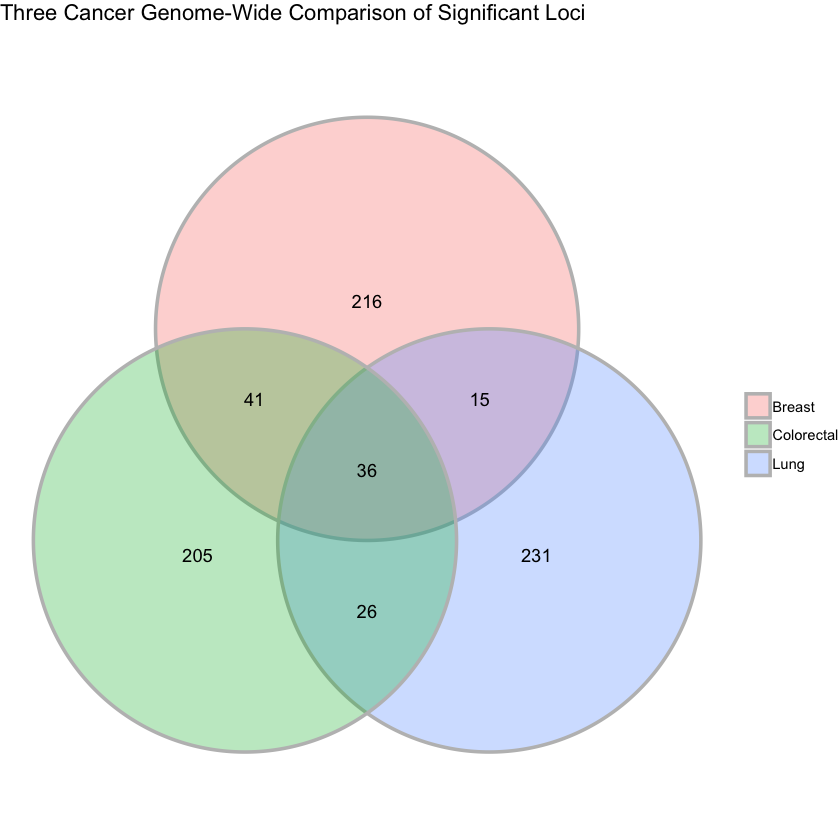

In [36]:
require(ggforce)

venn_data <- tibble(values = venn_values, x = c(0, 1.2, -1.2, 0.8, -0.8, 0, 0),
         y = c(1.2, -0.6, -0.6, 0.5, 0.5, -1, 0))

df.venn <- data.frame(x = c(0, 0.866, -0.866),
                      y = c(1, -0.5, -0.5),
                      cancer_types = c('Breast', 'Lung', 'Colorectal'))
    
ggplot(df.venn, aes(x0 = x, y0 = y, r = 1.5, fill = cancer_types)) + 
    labs(title = "Three Cancer Genome-Wide Comparison of Significant Loci") +
    geom_circle(alpha = .3, size = 1, colour = 'grey') +
    coord_fixed() + theme_void() + theme(legend.title = element_blank(), plot.title = element_text(vjust = 15)) + 
    annotate("text", x = venn_data$x, y = venn_data$y, label = venn_data$values)

### Compare silent vs nonsilent correlations

In [37]:
lung_s_vs_ns <- bind_rows((tcga_brca_hotspots %>% 
                              mutate(nonsilent = FALSE) %>% 
                              filter(significance > quantile(significance, .99))),
                          (tcga_brca_hotspots_ns %>% 
                              mutate(nonsilent = TRUE) %>% 
                              filter(significance > quantile(significance, .99))))

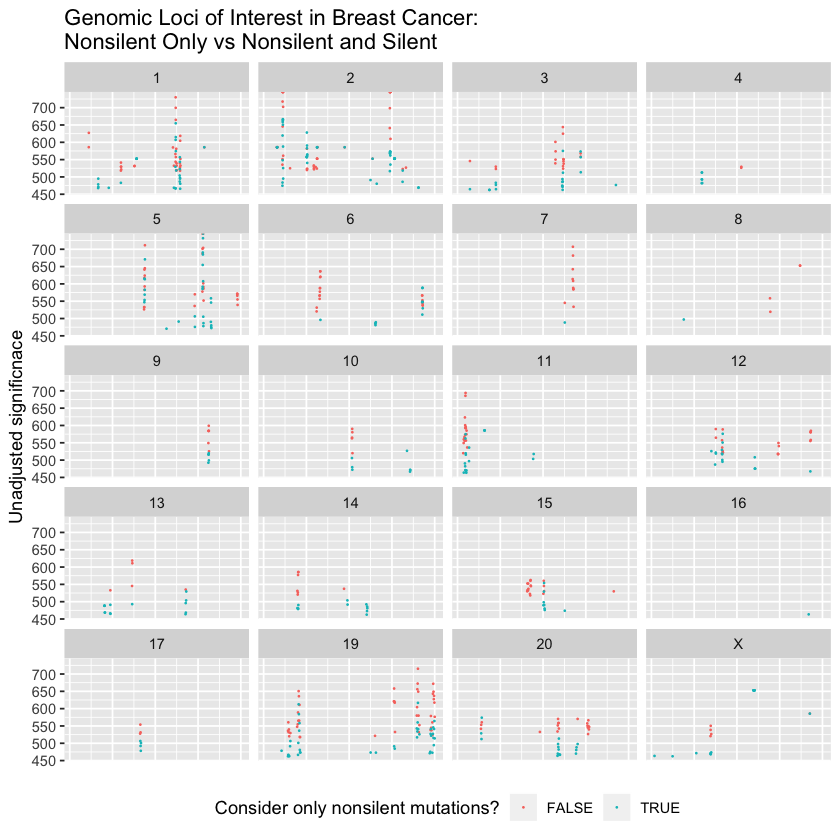

In [58]:
lung_s_vs_ns %>% 
    ggplot(aes(x = key, y = significance, colour = nonsilent)) +
    geom_point(size = 0.1) + facet_wrap(~factor(chromosome, levels = chromosomes), ncol = 4) +
    scale_colour_discrete(name="Consider only nonsilent mutations?") + 
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) + theme(legend.position = "bottom") +
    ggtitle("Genomic Loci of Interest in Breast Cancer:\nNonsilent Only vs Nonsilent and Silent ") +
    labs(x = NULL, y = "Unadjusted significnace") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

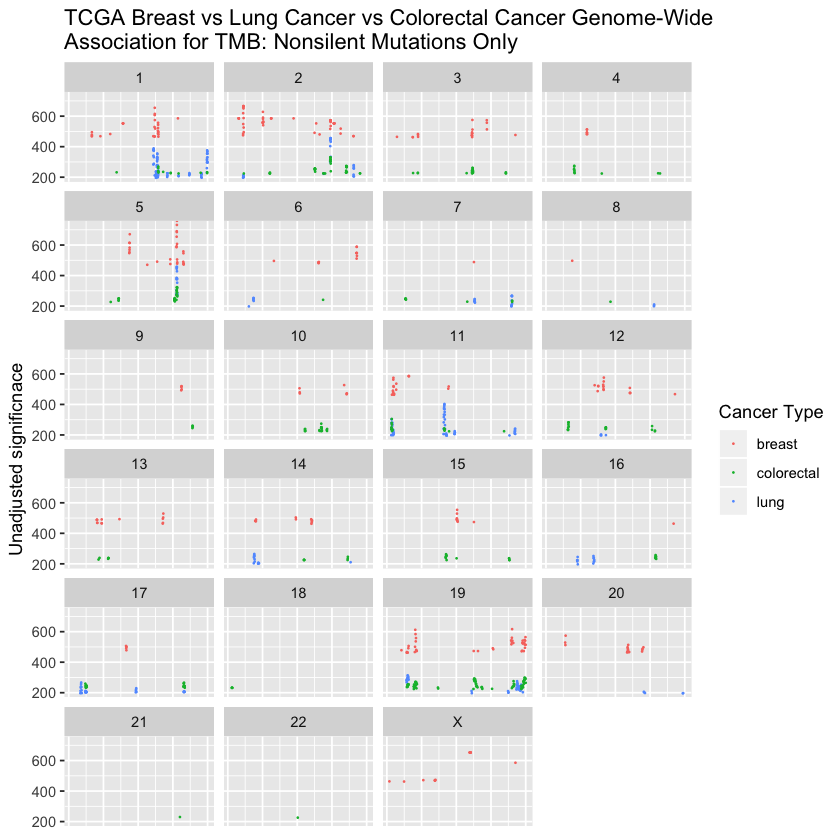

In [40]:
three_types_hotspots_ns <- bind_rows((tcga_brca_hotspots_ns %>% 
                                      mutate(cancer_type = "breast") %>% 
                                      filter(significance > quantile(significance, .99))),
                                 (tcga_nsclc_hotspots_ns %>% 
                                     mutate(cancer_type = "lung") %>% 
                                     filter(significance > quantile(significance, .99))),
                                 (tcga_coadread_hotspots_ns %>% 
                                     mutate(cancer_type = "colorectal") %>% 
                                     filter(significance > quantile(significance, .99))))

three_types_hotspots_ns %>% 
    ggplot(aes(x = key, y = significance, colour = cancer_type)) + 
    geom_point(size = 0.1) + scale_size(range = c(0.1,0.5)) + #theme(legend.position = c(0.6,0.075)) + 
    labs(x = NULL, y = "Unadjusted significnace") + scale_colour_discrete(name="Cancer Type") +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())+
    ggtitle("TCGA Breast vs Lung Cancer vs Colorectal Cancer Genome-Wide\nAssociation for TMB: Nonsilent Mutations Only") + facet_wrap(~factor(chromosome, levels = chromosomes), ncol = 4)
    

In [59]:
venn_values_ns <- three_types_hotspots_ns %>% 
    spread(key = cancer_type, value = significance) %>% 
    group_by(chromosome, position) %>% 
    summarise(b   = !is.na(breast) &  is.na(lung) &  is.na(colorectal), 
              l   =  is.na(breast) & !is.na(lung) &  is.na(colorectal), 
              c   =  is.na(breast) &  is.na(lung) & !is.na(colorectal),
              bl  = !is.na(breast) & !is.na(lung) &  is.na(colorectal),
              bc  = !is.na(breast) &  is.na(lung) & !is.na(colorectal),
              lc  =  is.na(breast) & !is.na(lung) & !is.na(colorectal),
              blc = !is.na(breast) & !is.na(lung) & !is.na(colorectal)) %>% 
    ungroup() %>% 
    select(3:9) %>% 
    colSums()

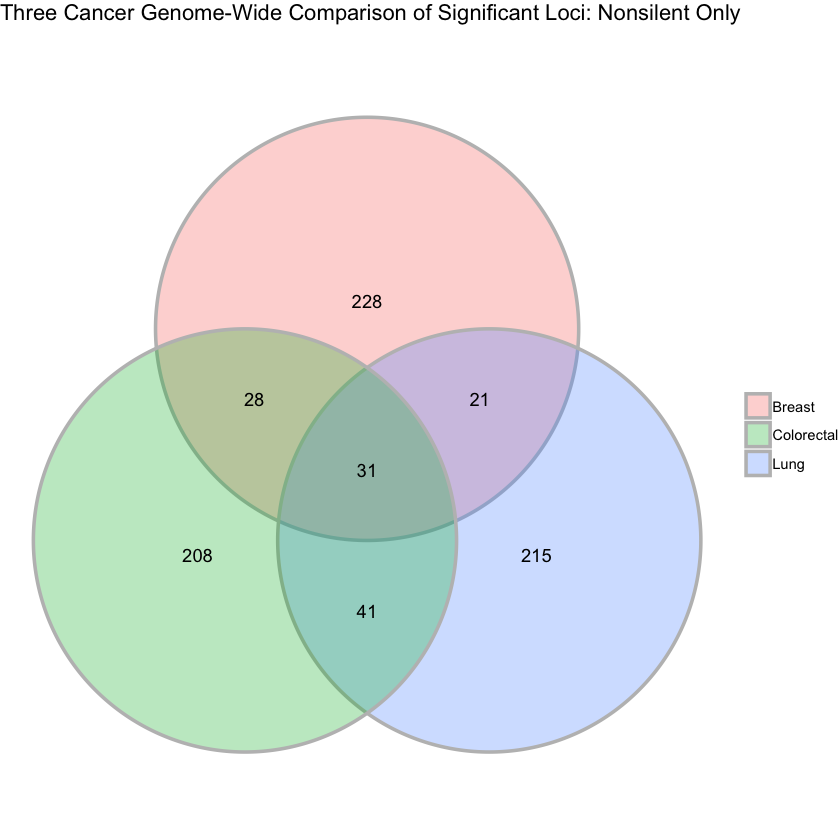

In [61]:
require(ggforce)

venn_data <- tibble(values = venn_values_ns, x = c(0, 1.2, -1.2, 0.8, -0.8, 0, 0),
         y = c(1.2, -0.6, -0.6, 0.5, 0.5, -1, 0))

df.venn <- data.frame(x = c(0, 0.866, -0.866),
                      y = c(1, -0.5, -0.5),
                      cancer_types = c('Breast', 'Lung', 'Colorectal'))
    
ggplot(df.venn, aes(x0 = x, y0 = y, r = 1.5, fill = cancer_types)) + 
    labs(title = "Three Cancer Genome-Wide Comparison of Significant Loci: Nonsilent Only") +
    geom_circle(alpha = .3, size = 1, colour = 'grey') +
    coord_fixed() + theme_void() + theme(legend.title = element_blank(), plot.title = element_text(vjust = 15)) + 
    annotate("text", x = venn_data$x, y = venn_data$y, label = venn_data$values)